In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

### Exploratory Data Analysis

#### Uploading the dataset

In [91]:
dataset = pd.read_csv('diabetes_dataset.csv')

In [92]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Finding number of features

In [93]:
dataset.shape # (768, 9)

(768, 9)

In [94]:
dataset.columns.values 
'''array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)'''

"array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',\n       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],\n      dtype=object)"

In [95]:
dependent_variable = ['Outcome'] # 1 = having diebetes
indepenent_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

#### Finding missing values in the dataset

In [96]:
dataset.isnull().sum() # missing value
#for i in dataset.columns.values:
 #   print('{} : {}'/format(i, dataset[i].isna().sum())) 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Finding Numerical Features

In [97]:
#All the features are numerical features

In [98]:
# No date feature is present

In [99]:
# All features are continueous features

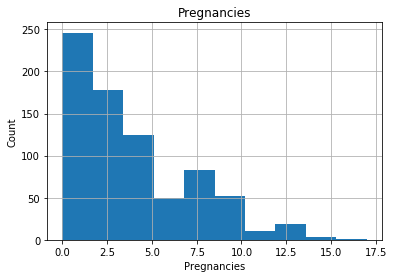

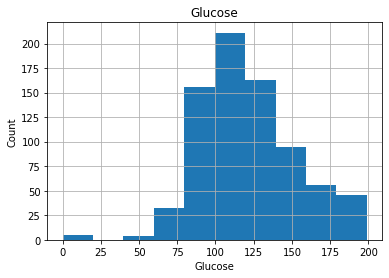

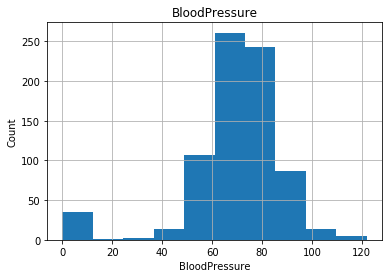

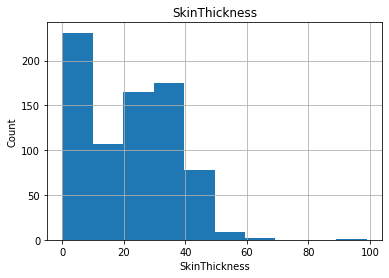

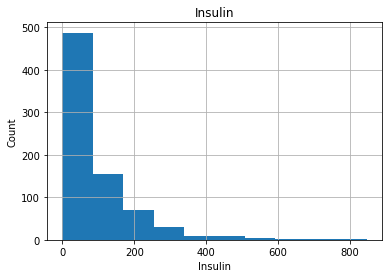

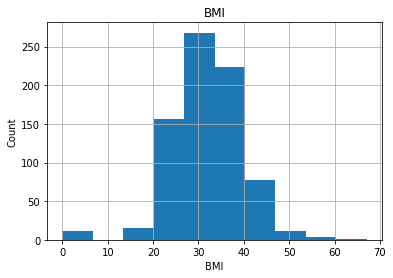

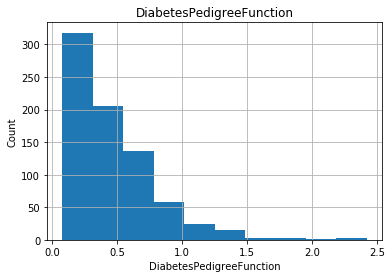

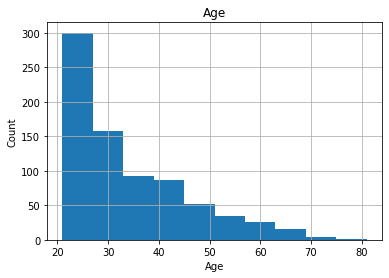

In [100]:
for i in indepenent_variables:
    data=dataset.copy()
    data[i].hist(bins=10)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()
#Features not following gaussian dist :
non_gauss = ['Pregnancies', 'Insulin','DiabetesPedigreeFunction', 'Age']  #Right Skewd
#Features following gaussian dist :
#['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
#From the histogram we can observe that some features like ['Glucose','BloodPressure', 'BMI'] should not be zero

#### Finding features containing zeroes.

In [101]:
p=[]
for i in indepenent_variables:
    if any(dataset[i]==0):
        p.append(i)
p

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

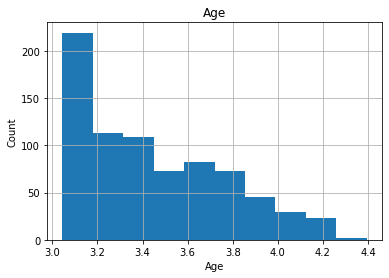

'for i in non_gauss:\n    data=dataset.copy()\n    data=dataset.copy()\n    if 0 in data[i]:\n        continue\n    else:\n        #data[i]= data[i].apply(lambda x: np.log(x) if x!=0 else np.nan)\n        data[i]= np.log(data[i])\n        data[i].hist(bins=50)\n        plt.xlabel(i)\n        plt.ylabel("Count")\n        plt.title(i)\n        plt.show()'

In [102]:
#Age is the only variable which do not contain zero.
#Trying to make it normal dist.
data = dataset.copy()
data['Age'] = np.log(data['Age'])
data['Age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel("Count")
plt.title('Age')
plt.show() # not forming normal Dist.
'''for i in non_gauss:
    data=dataset.copy()
    data=dataset.copy()
    if 0 in data[i]:
        continue
    else:
        #data[i]= data[i].apply(lambda x: np.log(x) if x!=0 else np.nan)
        data[i]= np.log(data[i])
        data[i].hist(bins=50)
        plt.xlabel(i)
        plt.ylabel("Count")
        plt.title(i)
        plt.show()'''
#not possible

In [103]:
# Insulin and Pregnancies can be zero but others can't. So we droping these two features from zero_features. 
# First replacing zero values of zero_features ['Glucose','BloodPressure', 'BMI'] features with mode
#'Glucose' contains 5 zeroes
#'BloodPressure' contains 35 zeroes
#''BMI' contains 11 zeroes
zero_features = ['Glucose','BloodPressure', 'BMI', 'SkinThickness']
for i in zero_features:
    print('{}: {}'.format(i,(dataset[dataset[i]==0][i].count())/768))
#dataset[dataset['BMI']==0]['BMI'].count()

Glucose: 0.006510416666666667
BloodPressure: 0.045572916666666664
BMI: 0.014322916666666666
SkinThickness: 0.2955729166666667


In [104]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [105]:
# Checking whether data is imbalanced or not
dataset.groupby('Outcome').count()
#outcome 0 is having 500 values
#outcome 1 is having 268 values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


### Feature Engineering 

In [106]:
# First replacing zero values of ['Glucose','BloodPressure', 'BMI'] features with median
for i in zero_features:
    k=dataset[i][dataset[i]>0].median()
    dataset[i][dataset[i]==0]=k
    #dataset[i][dataset[i].values==k]
zero_features = ['Glucose','BloodPressure', 'BMI', 'SkinThickness']
for i in zero_features:
    print('{}: {}'.format(i,(dataset[dataset[i]==0][i].count())/768))

Glucose: 0.0
BloodPressure: 0.0
BMI: 0.0
SkinThickness: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cw

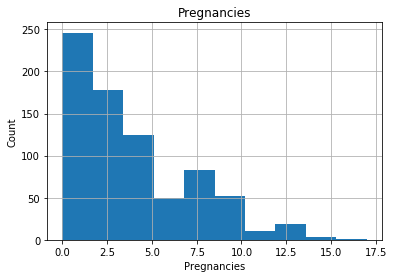

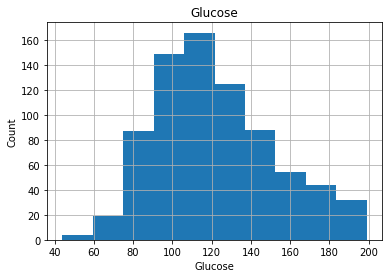

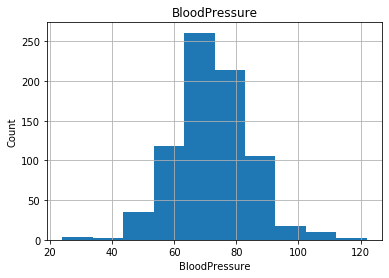

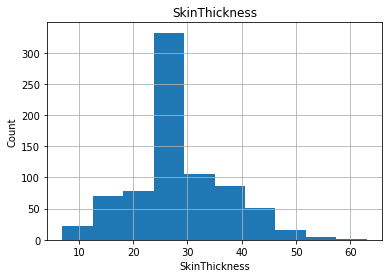

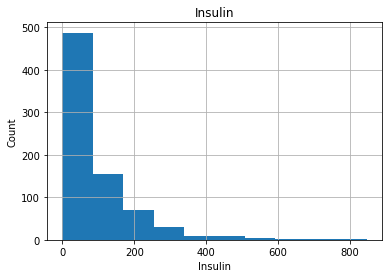

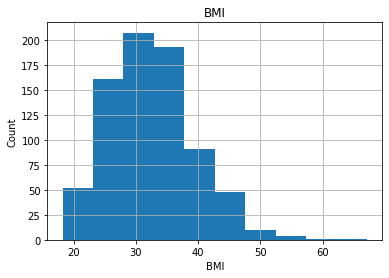

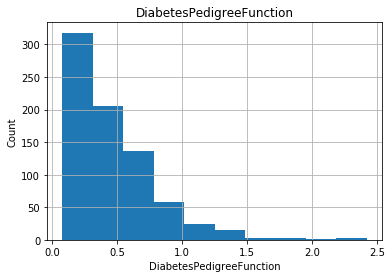

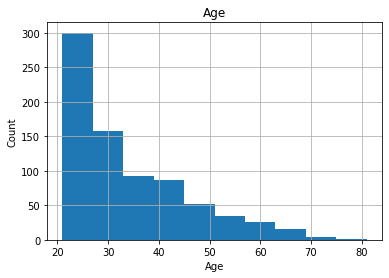

In [107]:
#SkinThickness feature contains upper boundary ouliers
dataset['SkinThickness'][dataset['SkinThickness'] > 80] = dataset['SkinThickness'][dataset['SkinThickness']<=80].median()
for i in indepenent_variables:
    data=dataset.copy()
    data[i].hist(bins=10)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

In [108]:
# Handling imbalanceness of dataset
#Here, our dataset is not large enough to apply downsampling
#So, we will upsample the data 

In [109]:
#dataset.to_csv('Dataset_after_feature_engineering.csv', index = False)